In [2]:
# make values to eval on.
import numpy as np
import random
ran = np.random.rand(1000000,6) 
sample_points = np.random.rand(1000,6) 

In [3]:
# import qdf samples
import sys
sys.path.append('..')
import numpy as np
samples = np.load('../mock_data/qdf/data/sampleV_at_(0.0,0.0,0.0)_epsilon=0.5.npy')

In [36]:
def galactocentric_to_galactic(point):
    x, y, z, vx, vy, vz = point
    coord = SkyCoord(frame = 'galactocentric', representation_type = CartesianRepresentation,
                     differential_type = CartesianDifferential,
    x = x*unit.kpc, y = y*unit.kpc, z = z*unit.kpc,
    v_x = vx*unit.km/unit.s, v_y = vy*unit.km/unit.s,
    v_z = vz*unit.km/unit.s)
    coord = coord.transform_to('galactic')
    coord.representation_type = CartesianRepresentation
    u = coord.u.value
    v = coord.v.value
    w = coord.w.value
    U = coord.U.value
    V = coord.V.value
    W = coord.W.value
    return np.array([u, v, w, U, V, W])

In [2]:
# 1. QDF
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleAdiabatic
from galpy.df import quasiisothermaldf
aA= actionAngleAdiabatic(pot=MWPotential2014,c=True)


from galpy.util.bovy_coords import *

qdf= quasiisothermaldf(1./3.,0.2,0.1,1.,1.,pot=MWPotential2014,aA=aA,cutcounter=True)

In [34]:
import numpy as np
x1 = np.linspace(1.1, 2.1, 1000)
y = np.empty([])
for i in np.nditer(x1):
    y = np.append(y, qdf(float(i),0.,0.,0.,0.))
print(len(y), y)


1001 [ 1.1  0.   0.  ...,  0.   0.   0. ]


In [6]:
qdf(0.,0.,0.,0.,0.)

array([ 0.])

In [15]:
# 2. KDE
#Importing the required modules for KDE
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import iqr

def generate_KDE(inputs, ker, v_scale):
    #Scaling velocities with v_scale
    positions, velocities = np.hsplit(inputs, 2)
    velocities_scaled = velocities*v_scale
    inputs = np.hstack((positions, velocities_scaled))
    
    #Optimizing bandwidth in terms of Scott's Rule of Thumb
    shape_string = str(inputs.shape)
    objects, parameters = shape_string.split(', ')
    N_string = objects[1:]
    N = int(N_string)
    IQR = iqr(inputs)
    A = min(np.std(inputs), IQR/1.34)
    bw = 1.059 * A * N ** (-1/5.)
    
    #Fit data points to selected kernel and bandwidth
    kde = KernelDensity(kernel=ker, bandwidth=bw).fit(inputs)  
    return kde

def input_KDE(samples, kde, v_scale):
    #To correct the type of information from other functions into acceptable input
    samples = np.array(samples)
        
     #Scaling samples with v_scale
    samp_positions, samp_velocities = np.hsplit(samples, 2)
    samp_velocities_scaled = samp_velocities*v_scale
    samples = np.hstack((samp_positions, samp_velocities_scaled))
        
    #Get the log density for selected samples and apply exponential to get normal probabilities
    log_dens = kde.score_samples(samples)
    dens = np.exp(log_dens)
        
    #Return a 1xQ array of normal probabilities for the selected sample
    return dens
    


In [58]:
samples_qdf = np.load('../mock_data/qdf/data/sampleV_at_(0.0,0.0,0.0)_epsilon=0.5.npy')

#convert cylindrical to rectangular
x, y, z = cyl_to_rect(samples_qdf[:,0], samples_qdf[:,1], samples_qdf[:,2])
vx, vy, vz = cyl_to_rect_vec(samples_qdf[:,3], samples_qdf[:,4], samples_qdf[:,5], samples_qdf[:,1])
samples_qdf = np.stack((x, y, z, vx, vy, vz), axis=1)


print('#stars', len(samples_qdf))
print('min/max/mean (x)', min(samples_qdf[:,0]), max(samples_qdf[:,0]), np.mean(samples_qdf[:,0]))
print('min/max/mean (y)', min(samples_qdf[:,1]), max(samples_qdf[:,1]), np.mean(samples_qdf[:,1]))
print('min/max/mean (z)', min(samples_qdf[:,2]), max(samples_qdf[:,2]), np.mean(samples_qdf[:,2]))
print('min/max/mean (vx)', min(samples_qdf[:,3]), max(samples_qdf[:,3]), np.mean(samples_qdf[:,3]))
print('min/max/mean (vy)', min(samples_qdf[:,4]), max(samples_qdf[:,4]), np.mean(samples_qdf[:,4]))
print('min/max/mean (vz)', min(samples_qdf[:,5]), max(samples_qdf[:,5]), np.mean(samples_qdf[:,5]))

#stars 1699708
min/max/mean (x) 0.900745306404 1.0163069654 0.957604602066
min/max/mean (y) 0.372132086095 0.422068087 0.396610815649
min/max/mean (z) -0.0590301240362 0.0656483040402 0.00256927025893
min/max/mean (vx) -260.936202178 170.664224015 -76.877111217
min/max/mean (vy) -6.85088036929 294.032239252 185.635885056
min/max/mean (vz) -78.6318475051 79.4952977672 -0.00151810605736


In [59]:
samples_ddf = np.load('../mock_data/dehnendf/data/1699708samples_3.0813469383936956-3.2018352601712126rad_7.800911997788074-8.799620277350543kpc.npy')
print('#stars', len(samples_ddf))
print('min/max/mean (x)', min(samples_ddf[:,0]), max(samples_ddf[:,0]), np.mean(samples_ddf[:,0]))
print('min/max/mean (y)', min(samples_ddf[:,1]), max(samples_ddf[:,1]), np.mean(samples_ddf[:,1]))
print('min/max/mean (z)', min(samples_ddf[:,2]), max(samples_ddf[:,2]), np.mean(samples_ddf[:,2]))
print('min/max/mean (vx)', min(samples_ddf[:,3]), max(samples_ddf[:,3]), np.mean(samples_ddf[:,3]))
print('min/max/mean (vy)', min(samples_ddf[:,4]), max(samples_ddf[:,4]), np.mean(samples_ddf[:,4]))
print('min/max/mean (vz)', min(samples_ddf[:,5]), max(samples_ddf[:,5]), np.mean(samples_ddf[:,5]))

#stars 1699708
min/max/mean (x) -12.3336813864 -3.68920230051 -8.3105739503
min/max/mean (y) -0.704801501565 0.67050998086 9.33418371294e-05
min/max/mean (z) -1.52609095465 1.5655696659 -0.000184323072449
min/max/mean (vx) -133.336430276 129.754301877 -0.0128272924158
min/max/mean (vy) -310.196982081 -98.2865069945 -218.103750639
min/max/mean (vz) -90.5724902592 89.5936405577 0.00133619911726


In [16]:
kde_qdf = generate_KDE(samples_qdf, 'epanechnikov', 0.1)


0.0454369728272


In [11]:
kde_ddf = generate_KDE(samples_ddf, 'epanechnikov', 0.1)

In [194]:
#use pickle to save objects
import pickle
pickle.dump(kde_qdf, open("kde_qdf_1699708_stars.p", "wb"), pickle.HIGHEST_PROTOCOL)
pickle.dump(kde_ddf, open("kde_ddf_1699708_stars.p", "wb"), pickle.HIGHEST_PROTOCOL)
pickle.dump(ran_kde, open("test.p", "wb"), pickle.HIGHEST_PROTOCOL)



e


In [67]:
samples_ddf.shape

(1699708, 6)

In [156]:
a = pickle.load(open("kde_ddf_1699708_stars.p", "rb"))

EOFError: Ran out of input

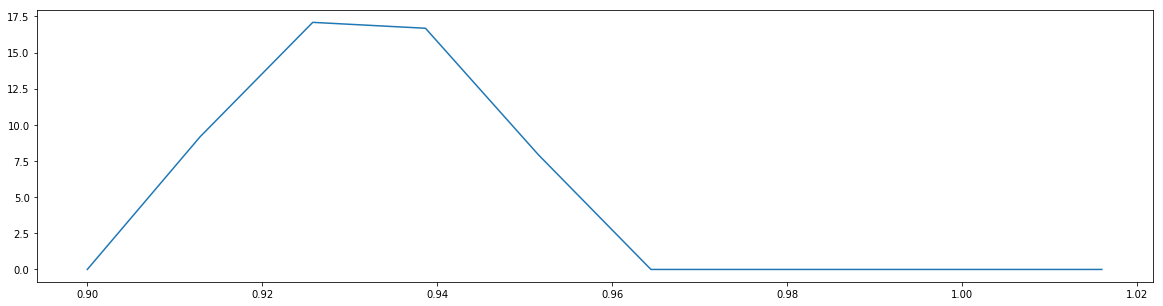

In [66]:
#plot qdf in x dim
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))
x1 = np.linspace(0.9, 1.016, 10)
x2 = [np.mean(samples_qdf[:,1])] * 10
x3 = [np.mean(samples_qdf[:,2])] * 10
x4 = [np.mean(samples_qdf[:,3])] * 10
x5 = [np.mean(samples_qdf[:,4])] * 10
x6 = [np.mean(samples_qdf[:,5])] * 10
points = np.stack((x1, x2, x3, x4, x5, x6), axis=1)
y = input_KDE(points, kde_qdf, 0.1)
plt.plot(x1, y)

plt.show()


In [177]:
input_KDE([[0,0,0,0,0,0], [0,0,0,0,1,1]], kde_qdf, 0.1)

array([ 0.,  0.])

In [192]:
ran_kde = generate_KDE(ran, 'epanechnikov', 0.1)

In [43]:
samples_qdf[:100]

array([[  9.82119865e-01,   4.02984973e-01,   5.23462235e-02,
         -7.87832804e+01,   2.10589571e+02,  -1.11876178e-01],
       [  9.70365391e-01,   4.00020820e-01,   2.78571816e-02,
         -3.54815383e+01,   1.93526031e+02,  -7.37105008e+00],
       [  9.77541618e-01,   4.01771754e-01,   4.35162906e-02,
         -9.60621280e+01,   2.05690812e+02,  -2.15995690e+01],
       [  9.60691571e-01,   3.97572530e-01,   7.95528405e-03,
         -1.52070383e+02,   1.83327452e+02,   3.01400005e+01],
       [  9.62151082e-01,   3.97934306e-01,   1.10123453e-02,
         -4.61552706e+01,   1.17224812e+02,   2.68081734e+01],
       [  9.62137415e-01,   3.97930598e-01,   1.09806365e-02,
         -1.19670926e+02,   1.30692231e+02,  -1.98404528e+01],
       [  9.65153097e-01,   3.98690398e-01,   1.71829376e-02,
          3.31985411e+01,   1.98399987e+02,   2.44304895e+01],
       [  9.78198006e-01,   4.02061693e-01,   4.45642446e-02,
         -6.49139260e+01,   1.68660880e+02,   2.99886545e+01],
